<a href="https://colab.research.google.com/github/Mratashnejad/Car-Detection-By-Brand-using-CNN/blob/main/CarDetectionUsingAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mratashnejad/Car-Detection-By-Brand-using-CNN/

Cloning into 'Car-Detection-By-Brand-using-CNN'...
remote: Enumerating objects: 11688, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 11688 (delta 5), reused 1 (delta 1), pack-reused 11673
Receiving objects: 100% (11688/11688), 1.60 GiB | 22.95 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (30805/30805), done.


**DANGER** : Removing extra files from the Dataset if they are not nessesary 


```
from google.colab import files
!rm -rf Car-Detection-By-Brand-using-CNN/Data/Test
!rm -rf Car-Detection-By-Brand-using-CNN/Data/Train
!rm -rf Car-Detection-By-Brand-using-CNN/Data/test
```



In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Car-Detection-By-Brand-using-CNN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/777e7afb-536d-47e1-85e8-2dbc9c925499.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/993e123e-8288-41f3-bb64-1f19f35794f8.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/6833b680-884b-4c7f-aa6a-d1394b364311.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/913a6284-709e-403c-bde5-707ea3edf81f.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/b6a13e3e-fe35-4d86-be5c-8bd3ae3c8768.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/07725ed0-f531-42bc-b898-0371c36288ef.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/f2c37439-8f3e-41de-81d6-7b375b31075a.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/bfd5c66b-976a-4907-8dd3-e442861b315f.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/1f1c05c8-7b76-4799-a07d-2eb2b6050a96.jpg
/content/Car-

In [16]:
import os
import random
import shutil

#set the path to data set directory

dataset_path = '/content/Car-Detection-By-Brand-using-CNN/Data/ClearData'


#set path fot training directory
train_path   =  '/content/Car-Detection-By-Brand-using-CNN/Data/train'

#set path for testing directory
test_path    =  '/content/Car-Detection-By-Brand-using-CNN/Data/test'

#set the split ratio
split_ratio = 0.8

#repating over subdirectories in the dataset directory

for sub_dir in os.listdir(dataset_path):
    sub_dir_path = os.path.join(dataset_path , sub_dir)
    
    if os.path.isdir(sub_dir_path):
        #create the traing and testing subdirectories
        
        train_sub_dir_path = os.path.join(train_path,sub_dir)
        test_sub_dir_path = os.path.join(test_path,sub_dir)
        os.makedirs(train_sub_dir_path , exist_ok = True)
        os.makedirs(test_sub_dir_path , exist_ok = True)
        
        #get the list of image files in the subdireotries
        
        image_files = [f for f in os.listdir(sub_dir_path) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg') or f.endswith('.svg')]
        
        #suffle random
        random.shuffle(image_files)
        
        #spliting images
        
        split_index = int(len(image_files) * split_ratio)
        train_files = image_files[:split_index]
        test_files  = image_files[split_index:]
        
        
        #copy traning files to the traingin subdirecotry
        
        for file_name in train_files:
            src_path = os.path.join(sub_dir_path,file_name)
            dst_path = os.path.join(train_sub_dir_path , file_name)
            shutil.copy(src_path,dst_path)
            
        #copy testing files to testing subdirectory
        
        for file_name in test_files:
            src_path = os.path.join(sub_dir_path , file_name)
            dst_path = os.path.join(test_sub_dir_path , file_name)
            shutil.copy(src_path,dst_path)
            
print("Dataset Split into training and testing sets.")

Dataset Split into training and testing sets.


In [17]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


#set path to  training and testing directories

train_dir = '/content/Car-Detection-By-Brand-using-CNN/Data/train'
os.makedirs(train_dir, exist_ok = True)
test_dir  = '/content/Car-Detection-By-Brand-using-CNN/Data/test'
os.makedirs(test_dir , exist_ok = True)

#set the image size

img_size = (224,244)

#set the batch size

batch_size = 32

#set the number of epochs

epochs = 30

#set the learning rate
learning_rate = 0.001

#create ImageDataGenerator to preProccess the data

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

#Load the training data and split it into training and validation sets

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size , batch_size = batch_size , class_mode = 'categorical')
val_data   = test_datagen.flow_from_directory(test_dir , target_size= img_size , batch_size = batch_size , class_mode = 'categorical')


#Define the model architecture CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3) , activation='relu' , input_shape=(img_size[0] , img_size[1] , 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

#compile model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#train the model
model.fit(train_data , epochs=epochs , validation_data=val_data)



Found 9222 images belonging to 21 classes.
Found 2321 images belonging to 21 classes.
Epoch 1/30
  1/289 [..............................] - ETA: 38:10 - loss: 3.0190 - accuracy: 0.0312

KeyboardInterrupt: ignored

In [21]:
score = model.evaluate(val_data)
#evaluate the model on the validation set
print(f"Validation set accuracy: {score[1]*100:.2f}%")

#save model

model.save('/content/Car-Detection-By-Brand-using-CNN/car_model_classifier.h5')

73/73 [==============================] - 106s 1s/step - loss: 2.7210 - accuracy: 0.1775
Validation set accuracy: 17.75%


In [22]:
model = tf.keras.models.load_model('car_model_classifier.h5')

In [23]:
test_dir = '/content/Car-Detection-By-Brand-using-CNN/Data/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 2321 images belonging to 21 classes.


In [24]:
y_pred = model.predict(test_data)


73/73 [==============================] - 109s 1s/step


In [27]:
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)


In [28]:
from sklearn.metrics import accuracy_score
y_true_classes = test_data.classes
acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test set accuracy: {acc*100:.2f}%")


Test set accuracy: 6.07%


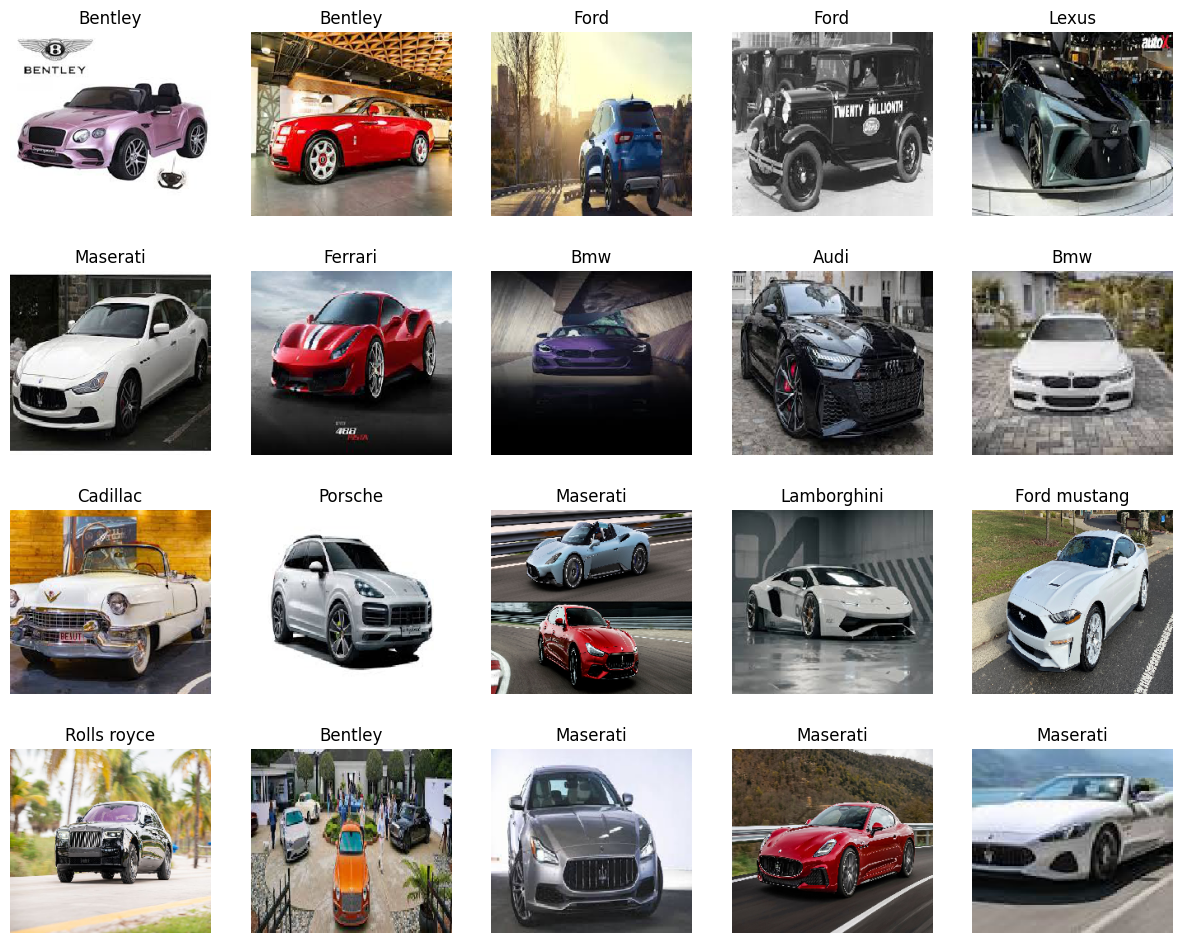

In [58]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


y_true_classes = test_data.classes
acc = accuracy_score(y_true_classes, y_pred_classes)
# plot some car images from the validation set
class_names = list(train_data.class_indices.keys())
images, labels = next(val_data)

plt.figure(figsize=(15,15))
for i in range(20):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")




In [51]:

plt.figure()
plt.plot(model.history.history['acc'], color ='teal' , label='Training Accuracy')
plt.plot(model.history['val_accuracy'], color ='orange' ,  label='Validation Accuracy')
fig.suptitle('Accuracy' , fontsize =20)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


TypeError: ignored

<Figure size 640x480 with 0 Axes>

73/73 [==============================] - 113s 2s/step


ValueError: ignored

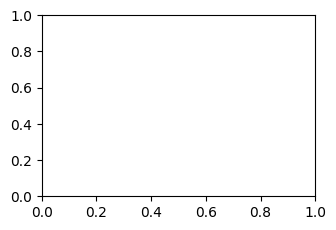

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# get the true class labels for the test data
test_labels = test_data.classes

# get the predicted probabilities for each class
pred_probs = model.predict(test_data)

# get the predicted class labels
pred_classes = np.argmax(pred_probs, axis=1)

# get the names of the classes
class_names = list(test_data.class_indices.keys())

# plot a random selection of images with their true and predicted class labels
num_images = 9
rand_idx = np.random.choice(len(test_labels), size=num_images, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(rand_idx):
    plt.subplot(3, 3, i+1)
    img = test_data[idx][0]
    img = np.array(img)
    img = np.squeeze(img) # reshape the image
    plt.imshow(img)
    true_label = class_names[test_labels[idx]]
    pred_label = class_names[pred_classes[idx]]
    plt.title(f"True: {true_label}\nPredicted: {pred_label}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

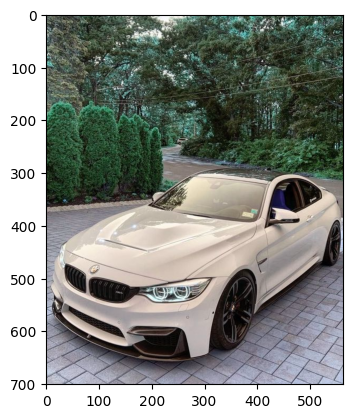

In [68]:
import cv2
img = cv2.imread('/content/Car-Detection-By-Brand-using-CNN/Data/testmodel.jpg')

plt.imshow(img)
plt.show

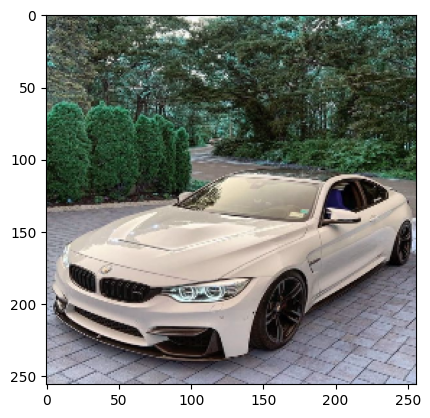

In [69]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

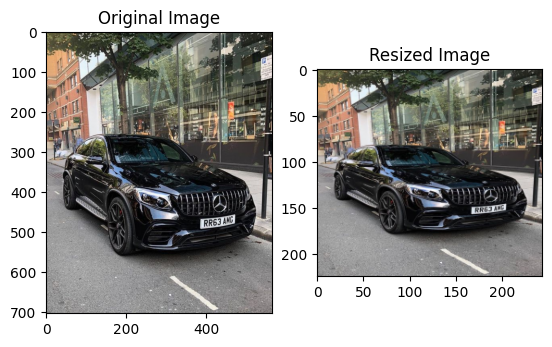

1/1 [==============================] - 0s 216ms/step
[[7.9875563e-06 6.3310191e-02 5.2261818e-02 3.4358349e-02 5.1460892e-02
  9.2904814e-02 4.0733125e-02 1.6419221e-02 5.3384084e-02 1.0458039e-01
  4.0847667e-02 3.5740472e-02 4.6387352e-02 1.3710363e-01 1.8581321e-02
  8.0559336e-02 9.6993949e-03 3.7360311e-02 1.2534341e-05 2.1501413e-02
  6.2785760e-02]]


In [81]:


import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
# Load the image
img = cv2.imread('/content/Car-Detection-By-Brand-using-CNN/Data/test2.jpg')

# Resize the image to match the input shape of the model
resize = cv2.resize(img, (244, 224), interpolation=cv2.INTER_AREA)

# Show the original and resized images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resize, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.show()

# Load the model
model = keras.models.load_model('/content/Car-Detection-By-Brand-using-CNN/car_model_classifier.h5')

# Prepare the image for input to the model
input_img = np.expand_dims(resize/255, 0)

# Obtain the predicted class probabilities for the image
class_probs = model.predict(input_img)

# Print the predicted class probabilities
print(class_probs)


In [82]:
# Obtain the predicted class probabilities for the image
class_probs = model.predict(input_img)

# Print the predicted car model
class_idx = np.argmax(class_probs)
class_labels = ['Acura', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'Bugatti',
                'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari',
                'FIAT', 'Fisker', 'Ford', 'Genesis', 'GMC', 'Honda', 'HUMMER',
                'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
                'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'Maserati', 'Maybach',
                'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI', 'Mitsubishi',
                'Nissan', 'Plymouth', 'Pontiac', 'Porsche', 'RAM', 'Rolls-Royce',
                'Saab', 'Saturn', 'Scion', 'smart', 'SRT', 'Subaru', 'Suzuki',
                'Tesla', 'Toyota', 'Volkswagen', 'Volvo']
print('This is a', class_labels[class_idx], 'car!')

1/1 [==============================] - 0s 76ms/step
This is a Fisker car!
